# Linear Regression on Real Estate dataset

# Importing Libraries

In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import DataFrame

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


plt.rcParams['figure.figsize'] = (10.0, 5.0)

# Importing Dataset and Finding no. of rows and attributes

In [23]:
dataset = pd.read_csv("Real_estate.csv")
print (dataset.shape)
dataset.head()

(414, 8)


,No,Transaction_date,House_age,Distance_to_the_nearest_MRT_station,No_of_convenience_stores,Latitude,Longitude,House_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Checking dataset type

In [24]:
dataset.dtypes

No                                       int64
Transaction_date                       float64
House_age                              float64
Distance_to_the_nearest_MRT_station    float64
No_of_convenience_stores                 int64
Latitude                               float64
Longitude                              float64
House_price_of_unit_area               float64
dtype: object

# Checking null values

In [48]:
dataset.isnull().sum()

No                                     0
Transaction_date                       0
House_age                              0
Distance_to_the_nearest_MRT_station    0
No_of_convenience_stores               0
Latitude                               0
Longitude                              0
House_price_of_unit_area               0
dtype: int64

# Dataset Statistics

In [26]:
dataset.describe()

,No,Transaction_date,House_age,Distance_to_the_nearest_MRT_station,No_of_convenience_stores,Latitude,Longitude,House_price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Normal distribution of pridicted attritube

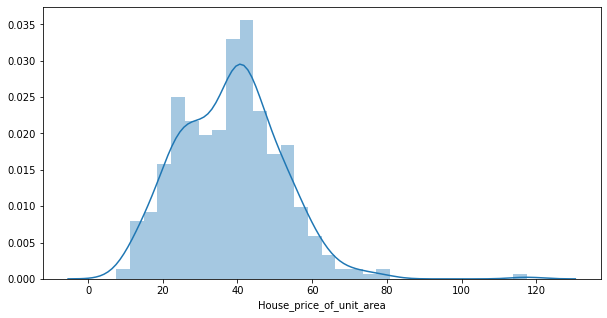

In [29]:
sns.distplot(dataset['House_price_of_unit_area'], bins=30)

# Detection of Outliers using boxplot

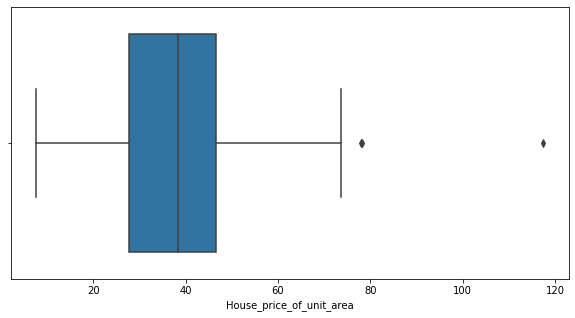

In [30]:
sns.boxplot(dataset.House_price_of_unit_area)

# Finding Corelation between Independent variable and Dependent Variable

In [50]:
dataset.corr()

,No,Transaction_date,House_age,Distance_to_the_nearest_MRT_station,No_of_convenience_stores,Latitude,Longitude,House_price_of_unit_area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
Transaction_date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
House_age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Distance_to_the_nearest_MRT_station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
No_of_convenience_stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
House_price_of_unit_area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


# Catplot graph between Independent variable and Dependent variable

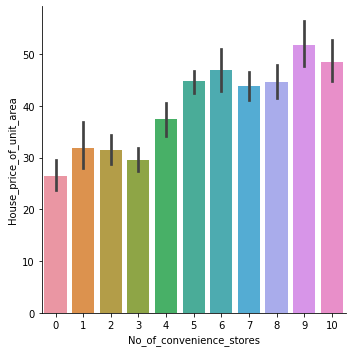

In [51]:
sns.catplot(x="No_of_convenience_stores", y="House_price_of_unit_area", kind="bar", data=dataset)

# Now finding slope and intercept values for linear regression equation

In [57]:
#collecting x and y
X = dataset['No_of_convenience_stores'].values
Y = dataset['House_price_of_unit_area'].values

#mean of x and y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#total number of values in x
n = len(X)

numenator = 0
denumenator = 0

for i in range(n):
    numenator += (X[i] - mean_x) * (Y[i] - mean_y)
    denumenator += (X[i] - mean_x) **2
    
    m = numenator / denumenator
    c = mean_y - (m * mean_x)

print ("Slope:", m)
print ("Intercept:", c)

Slope: 2.637653463404377
Intercept: 27.181104781472417


# Scatter plot between IDV and DV

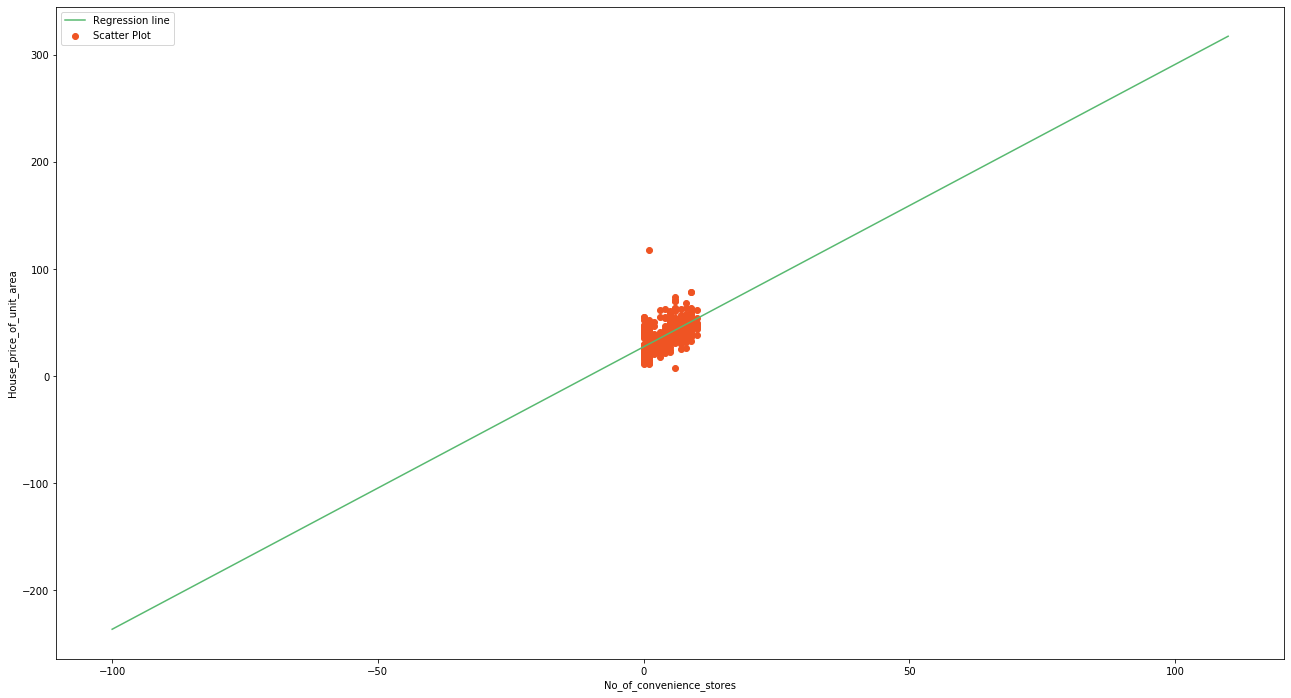

In [43]:
#plotting values and regression line
plt.figure(figsize=(22,12))
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#calculating line values
x = np.linspace(min_x, max_x, 1000)
y = c + m * x

#plotting line
plt.plot(x, y, color='#58b970', label='Regression line')

#scatter plotting
plt.scatter(X, Y, color = '#ef5423', label= 'Scatter Plot')

plt.xlabel('No_of_convenience_stores')
plt.ylabel('House_price_of_unit_area')
plt.legend()
plt.show()

# Finding R-square value

In [56]:
sumofpredictedvalue = 0
sumofactualvalue = 0

for i in range(n):
    y_predict = c + m * X[i]
    sumofpredictedvalue += (Y[i] - y_predict) ** 2
    sumofactualvalue += (Y[i] - mean_y) ** 2
    
r2 = 1 - (sumofpredictedvalue / sumofactualvalue)
print ("R2: ",r2)    

R2:  0.3260466085130501


# Applying Linear Regression Model

In [45]:
reg = linear_model.LinearRegression()
reg.fit(dataset[['No_of_convenience_stores']],dataset['House_price_of_unit_area'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#predicting House_price_of_unit_area by giving No_of_convenience_stores

reg.predict([[10]])

array([53.55763942])